In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import f

Ch01 P.1

In [ ]:
mydata = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/3600/ch04/Cholesterol.dat")
X = mydata[:,2]
Y = mydata[:,3]

In [1]:
X0 = [min(X),max(X)]
Y0 = [np.mean(Y),np.mean(Y)]
plt.plot(X, Y, 'ro')
plt.plot(X0,Y0)
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

NameError: ignored

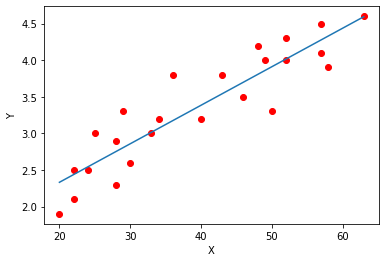

In [ ]:
Y1=np.array(X0)*0.0526+1.2799
plt.plot(X, Y, 'ro')
plt.plot(X0,Y1)
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

Ch03 P.6

In [ ]:
mydata = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/3600/ch04/Cholesterol.dat")
x = mydata[:,1:3]
y = mydata[:,3]
n,p=x.shape

In [ ]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
beta

array([1.27986835, 0.0526249 ])

P.10

In [ ]:
H=x @ ixtx @ x.T

P.13

In [ ]:
yhat=H @ y
yhat

array([3.70061395, 2.33236644, 4.01636338, 2.85861548, 4.2794879 ,
       2.59549096, 2.75336567, 3.17436491, 2.43761625, 3.54273924,
       4.2794879 , 3.0164902 , 2.43761625, 4.59523733, 3.38486453,
       3.80586376, 2.75336567, 3.85848867, 4.01636338, 4.33211281,
       2.80599058, 3.0691151 , 2.54286606, 3.91111357])

In [ ]:
res=(np.identity(n)-H) @ y
res

array([-0.20061395, -0.43236644, -0.01636338, -0.25861548,  0.2205121 ,
        0.40450904,  0.14663433,  0.62563509, -0.33761625,  0.25726076,
       -0.1794879 , -0.0164902 ,  0.06238375,  0.00476267, -0.18486453,
        0.39413624, -0.45336567,  0.14151133,  0.28363662, -0.43211281,
        0.49400942,  0.1308849 , -0.04286606, -0.61111357])

In [ ]:
sse=np.sum(res**2)
mse=sse/(n-p)
print(sse)
print(mse)

2.4548093723579854
0.11158224419809025


P.16

In [ ]:
varBeta=mse * ixtx
varBeta

array([[ 4.65259190e-02, -1.06240995e-03],
       [-1.06240995e-03,  2.69533180e-05]])

In [ ]:
seBeta=np.sqrt(np.diagonal(varBeta))
seBeta

array([0.21569868, 0.00519166])

In [ ]:
myt=t(df=n-p).ppf(0.975)
myt

2.0738730679040147

In [ ]:
CI=np.array([beta-myt*seBeta,beta+myt*seBeta])
CI

array([[0.83253668, 0.04185806],
       [1.72720003, 0.06339175]])

P.20

In [ ]:
x0=np.array([1,60])
yhat0= x0 @ beta
yhat0

4.437362615242164

In [ ]:
seI=np.sqrt(x0 @ varBeta @ x0 + mse)
seI

0.35728268070399544

In [ ]:
ciI=[yhat0-myt*seI, yhat0+myt*seI]
ciI

[3.6964036861015988, 5.1783215443827295]

In [ ]:
seM=np.sqrt(x0 @ varBeta @ x0)
seM

0.12676225673654956

In [ ]:
ciM=[yhat0-myt*seM, yhat0+myt*seM]
ciM

[4.1744737849695, 4.700251445514828]

Ch04 P.18

In [ ]:
c=np.array([[1,50],[1,60]])
g=c.shape[0]
l=c @ beta
l

array([3.91111357, 4.43736262])

In [ ]:
seM=np.sqrt(np.diagonal( c@ varBeta @ c.T))
seM

array([0.08756837, 0.12676226])

In [ ]:
myt=t(df=n-p).ppf(1-.025/g)
myt

2.40547274626175

In [ ]:
ciB=l-myt*seM,l+myt*seM
np.transpose(ciB)

array([[3.70047025, 4.12175689],
       [4.13243946, 4.74228577]])

In [ ]:
myF=f(dfn=g,dfd=n-p).ppf(0.95)
myF

3.4433567793667237

In [ ]:
ciS=l-np.sqrt(g*myF)*seM,l+np.sqrt(g*myF)*seM
np.transpose(ciS)

array([[3.68131186, 4.14091528],
       [4.10470615, 4.77001908]])

P.20

In [ ]:
1/ixtx[1,1]

4139.833333333338

Ch06 P.8

In [ ]:
sst=np.sum((y-np.mean(y))**2)
ssr1=sst-sse

In [ ]:
x3=np.c_[x,x[:,1]**2,x[:,1]**3]
beta3=np.linalg.inv(x3.T @ x3) @  x3.T @ y
yhat3=x3 @ beta3
res3=y-yhat3
sse3=np.sum(res3**2)
ssext=sse-sse3
msext=ssext/2
mse3=sse3/(n-4)
fRatio=msext/mse3
fRatio

1.4008910809623658

In [ ]:
f(dfn=2,dfd=n-4).ppf(0.95)

3.492828476735632

In [ ]:
1-f(2,n-4).cdf(fRatio)

0.2695330548947057

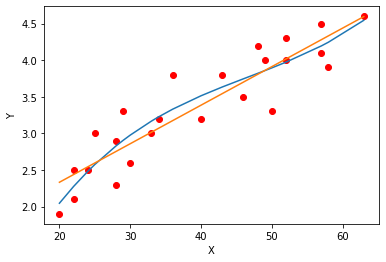

In [ ]:
xinds = X.argsort()
sorted_x = X[xinds[::-1]]
sorted_yhat3 = yhat3[xinds[::-1]]
sorted_yhat=yhat[xinds[::-1]]

plt.plot(X, Y, 'ro')
plt.plot(sorted_x,sorted_yhat3)
plt.plot(sorted_x,sorted_yhat)
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()